# Examen Cancer


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Metrics
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, make_scorer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Class imbalance
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

## Data Cleaning

### Load Data

In [5]:
df = pd.read_csv('data/cancer_prediction.csv')
df.shape

(524, 12)

In [6]:
pd.options.display.max_columns = None   #para que muestren todas las columnas
df.head()

,indicator_1,indicator_2,indicator_3,indicator_4,indicator_5,indicator_6,indicator_7,indicator_8,indicator_9,indicator_10,indicator_11,class
0,1,3,7,1,3,2,4,3,4,D,ZT,1
1,1,10,8,10,6,10,10,10,10,A,ZF,1
2,3,3,5,1,3,3,3,3,3,A,ZT,1
3,1,1,2,1,2,1,1,1,1,A,ZM,0
4,3,10,10,8,7,10,1,10,7,A,ZT,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   indicator_1   524 non-null    int64 
 1   indicator_2   524 non-null    int64 
 2   indicator_3   524 non-null    int64 
 3   indicator_4   524 non-null    int64 
 4   indicator_5   524 non-null    int64 
 5   indicator_6   524 non-null    int64 
 6   indicator_7   524 non-null    object
 7   indicator_8   524 non-null    int64 
 8   indicator_9   524 non-null    int64 
 9   indicator_10  524 non-null    object
 10  indicator_11  524 non-null    object
 11  class         524 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 49.3+ KB


### Clean Data
- Use all features?
- Null values? Drop, mean, median, mode, ...
- Duplicated values? (see "duplicated" and "drop_duplicates" functions in pandas)
- Outliers.

#### NaNs

##### Inspection

In [8]:
# NaN values
nan_ser = df.isna().sum().sort_values(ascending=False)
nan_ser[nan_ser > 0]

Series([], dtype: int64)

#### Duplicates

In [9]:
df.duplicated().any()

True

In [11]:
df[df.duplicated(keep=False)]

,indicator_1,indicator_2,indicator_3,indicator_4,indicator_5,indicator_6,indicator_7,indicator_8,indicator_9,indicator_10,indicator_11,class
11,1,1,1,1,2,1,5,1,1,A,ZM,0
16,1,3,4,1,2,1,1,1,1,A,ZM,0
17,1,2,3,1,2,1,1,1,1,A,ZT,0
28,1,3,1,1,2,1,1,1,1,A,ZT,0
44,1,2,3,1,2,1,1,1,1,A,ZT,0
...,...,...,...,...,...,...,...,...,...,...,...,...
490,1,3,5,1,2,1,1,1,2,D,ZT,0
506,1,1,4,1,2,1,1,1,1,A,ZT,0
511,1,3,1,1,2,1,1,1,1,D,ZT,0
517,1,1,1,1,2,1,1,1,1,A,ZT,0


Salen duplicados los valores pero siguen siendo muestras de gente diferente, entonces las mantendremos

### Outliers

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
indicator_1,524.0,1.583969,1.742125,1.0,1.0,1.0,1.00,10.0
indicator_2,524.0,3.404580,2.393518,1.0,2.0,3.0,4.00,10.0
indicator_3,524.0,4.408397,2.760900,1.0,2.0,4.0,6.00,10.0
indicator_4,524.0,2.826336,2.861760,1.0,1.0,1.0,4.00,10.0
indicator_5,524.0,3.211832,2.248214,1.0,2.0,2.0,4.00,10.0
indicator_6,524.0,3.059160,2.975736,1.0,1.0,1.0,4.25,10.0
indicator_8,524.0,2.906489,3.090236,1.0,1.0,1.0,4.00,10.0
indicator_9,524.0,3.154580,2.902652,1.0,1.0,1.0,5.00,10.0
class,524.0,0.341603,0.474700,0.0,0.0,0.0,1.00,1.0


### Save CSV

In [13]:
df.to_csv('data/cancer_prediction_clean_data.csv', index=False)

## Exploratory Data Analysis (EDA)

- Outliers?
- Correlations?
- Consistency: do all values of the features and target make sense?
- Explore the data

### Load Data

In [80]:
df = pd.read_csv('data/cancer_prediction_clean_data.csv')

### Numerical features distribution

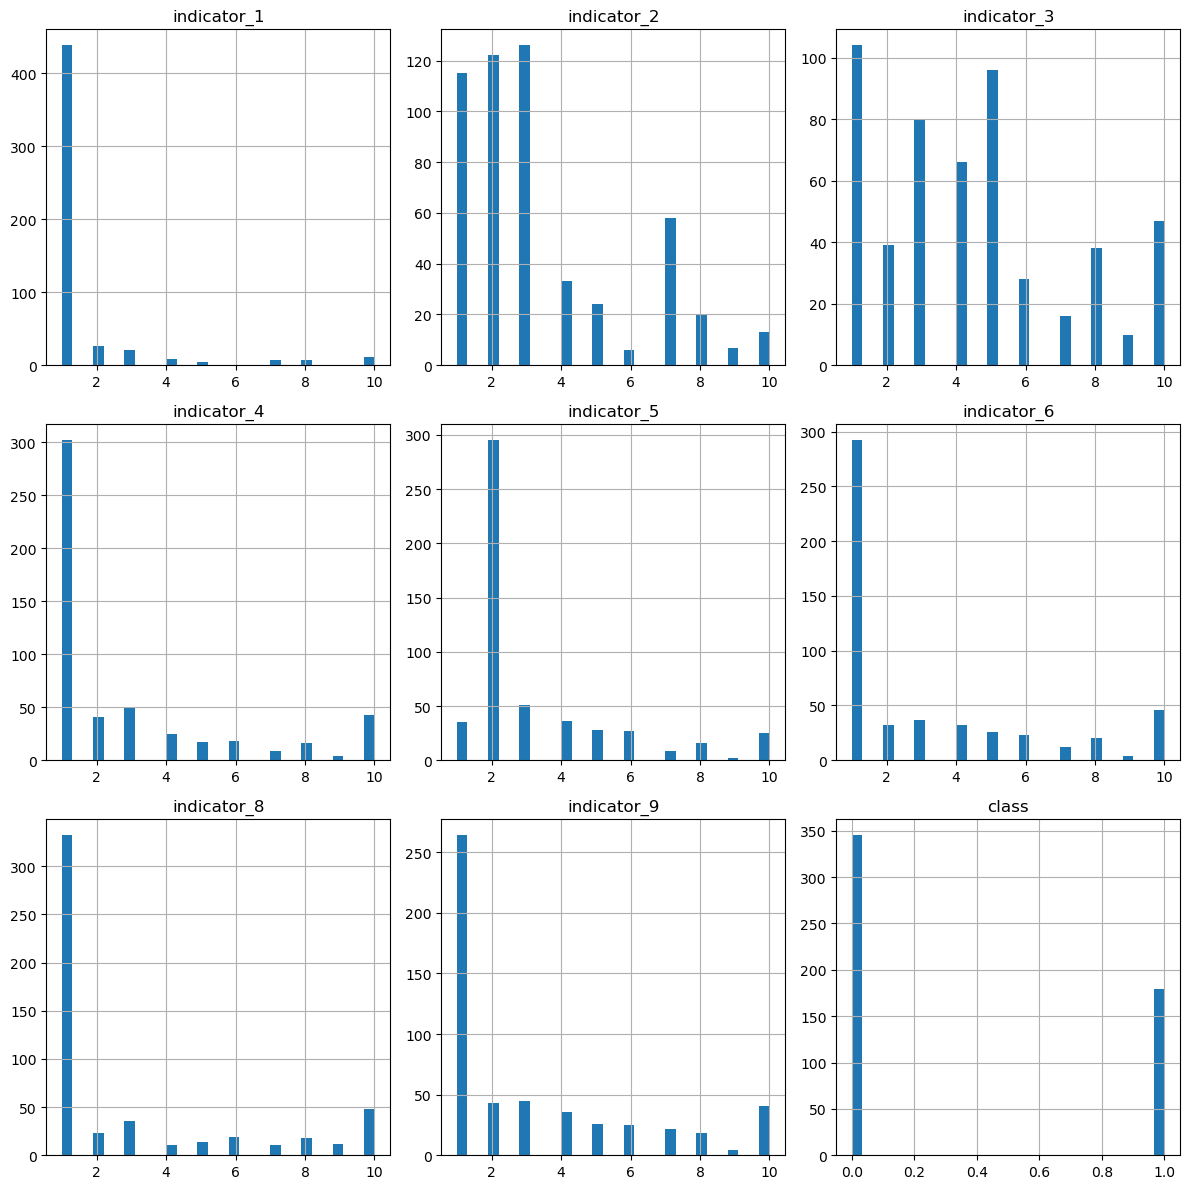

In [15]:
df.hist(bins=30, figsize=(12, 12))
plt.tight_layout()
plt.show()

In [16]:
df["class"].value_counts()

0    345
1    179
Name: class, dtype: int64

### Categorical features distribution

In [17]:
# Categorical features
df.columns[df.dtypes == 'object']

Index(['indicator_7', 'indicator_10', 'indicator_11'], dtype='object')

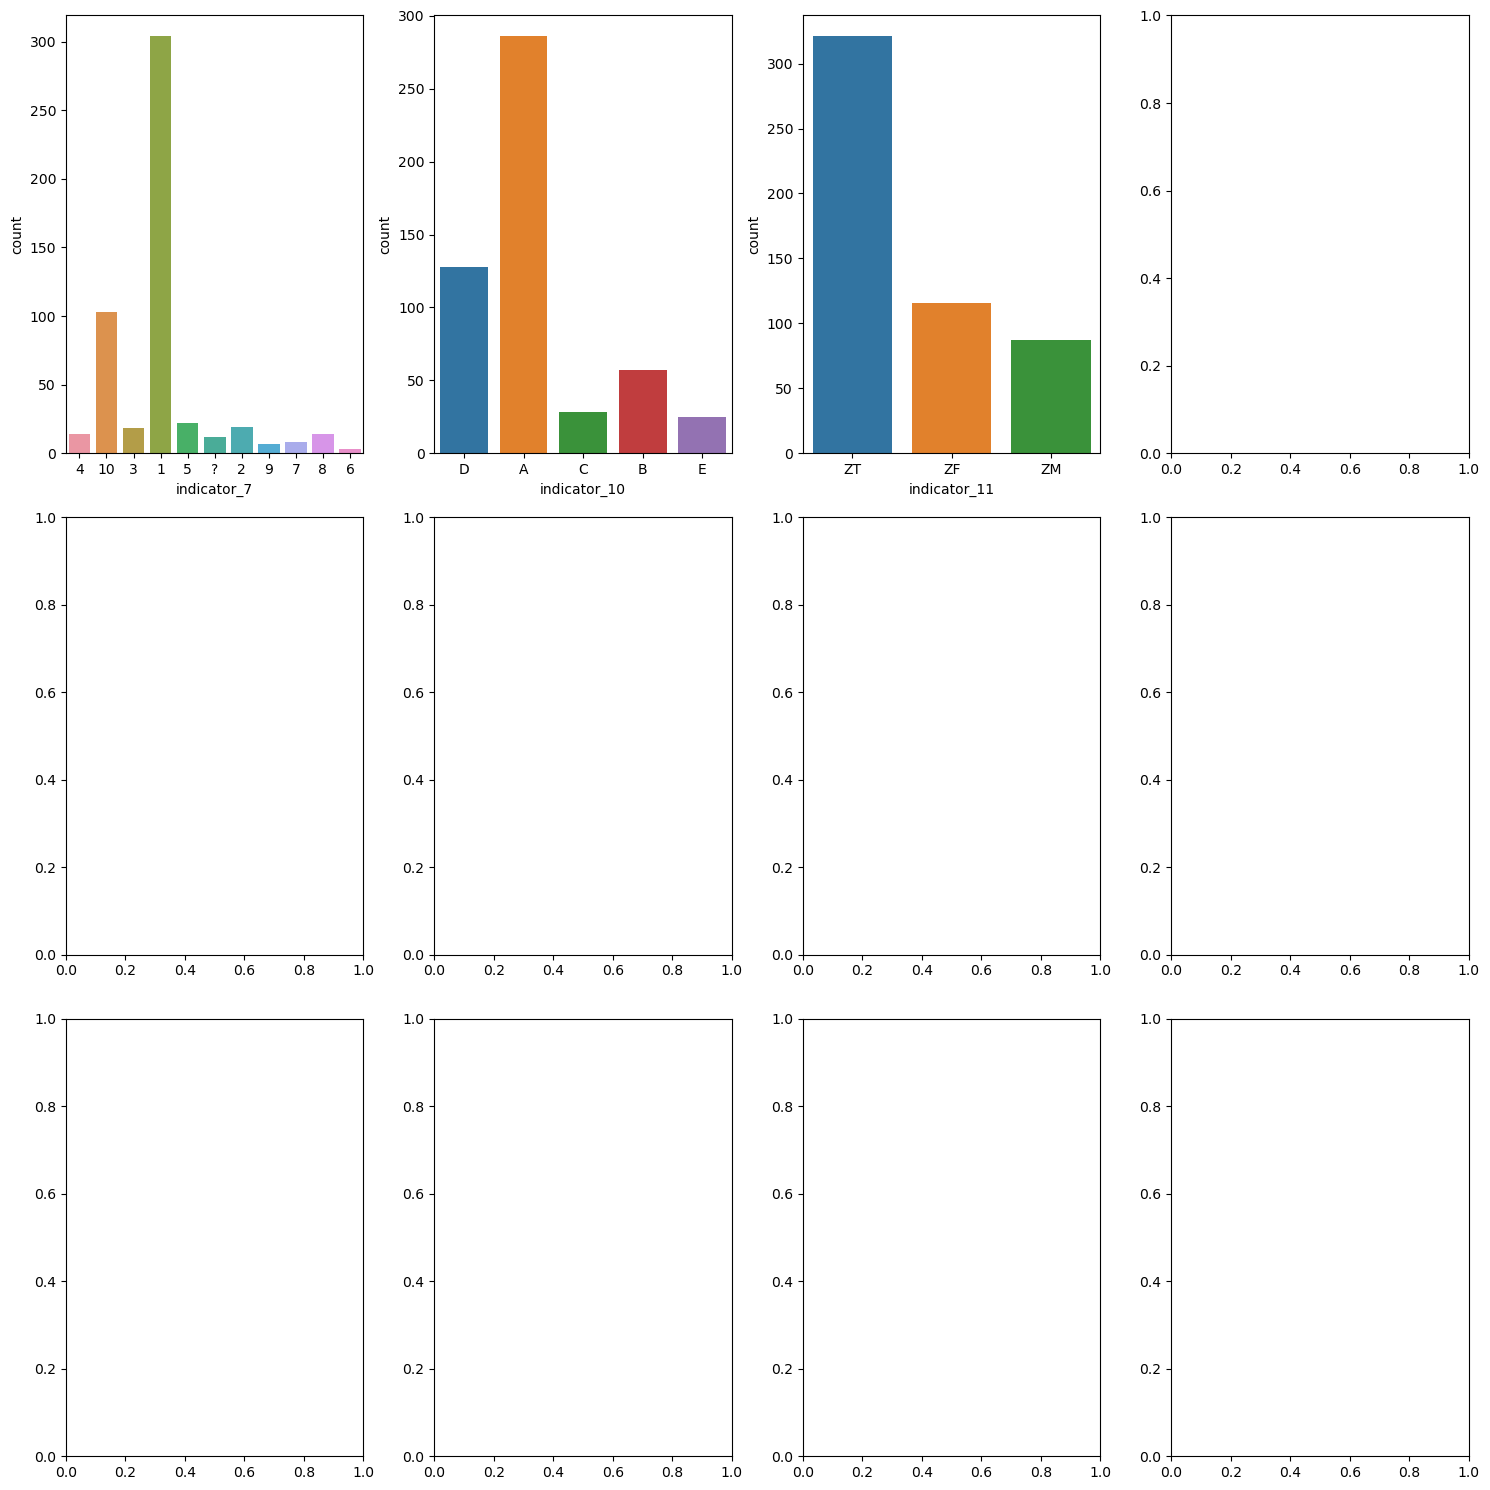

In [23]:
# 4 subplots in one row
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
obj_fts = df.columns[df.dtypes == 'object']

for i, col in enumerate(obj_fts):
    x, y = divmod(i, 4)
    sns.countplot(x=df[col], ax=axes[x, y])
    # axes[x, y].set_xticklabels(axes[x, y].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

### Correlation matrix

C:\Users\Alumne_mati1\AppData\Local\Temp\ipykernel_20776\3397144567.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white')


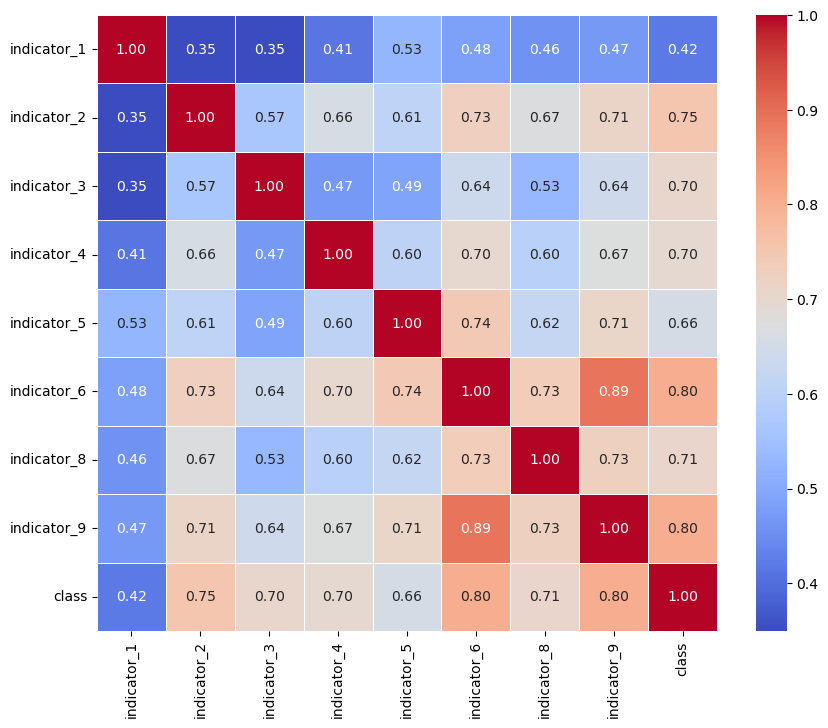

In [24]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white')

plt.show()

### Pair Plot

In [25]:
# Numerical features
df.select_dtypes(include='number').columns

Index(['indicator_1', 'indicator_2', 'indicator_3', 'indicator_4',
       'indicator_5', 'indicator_6', 'indicator_8', 'indicator_9', 'class'],
      dtype='object')

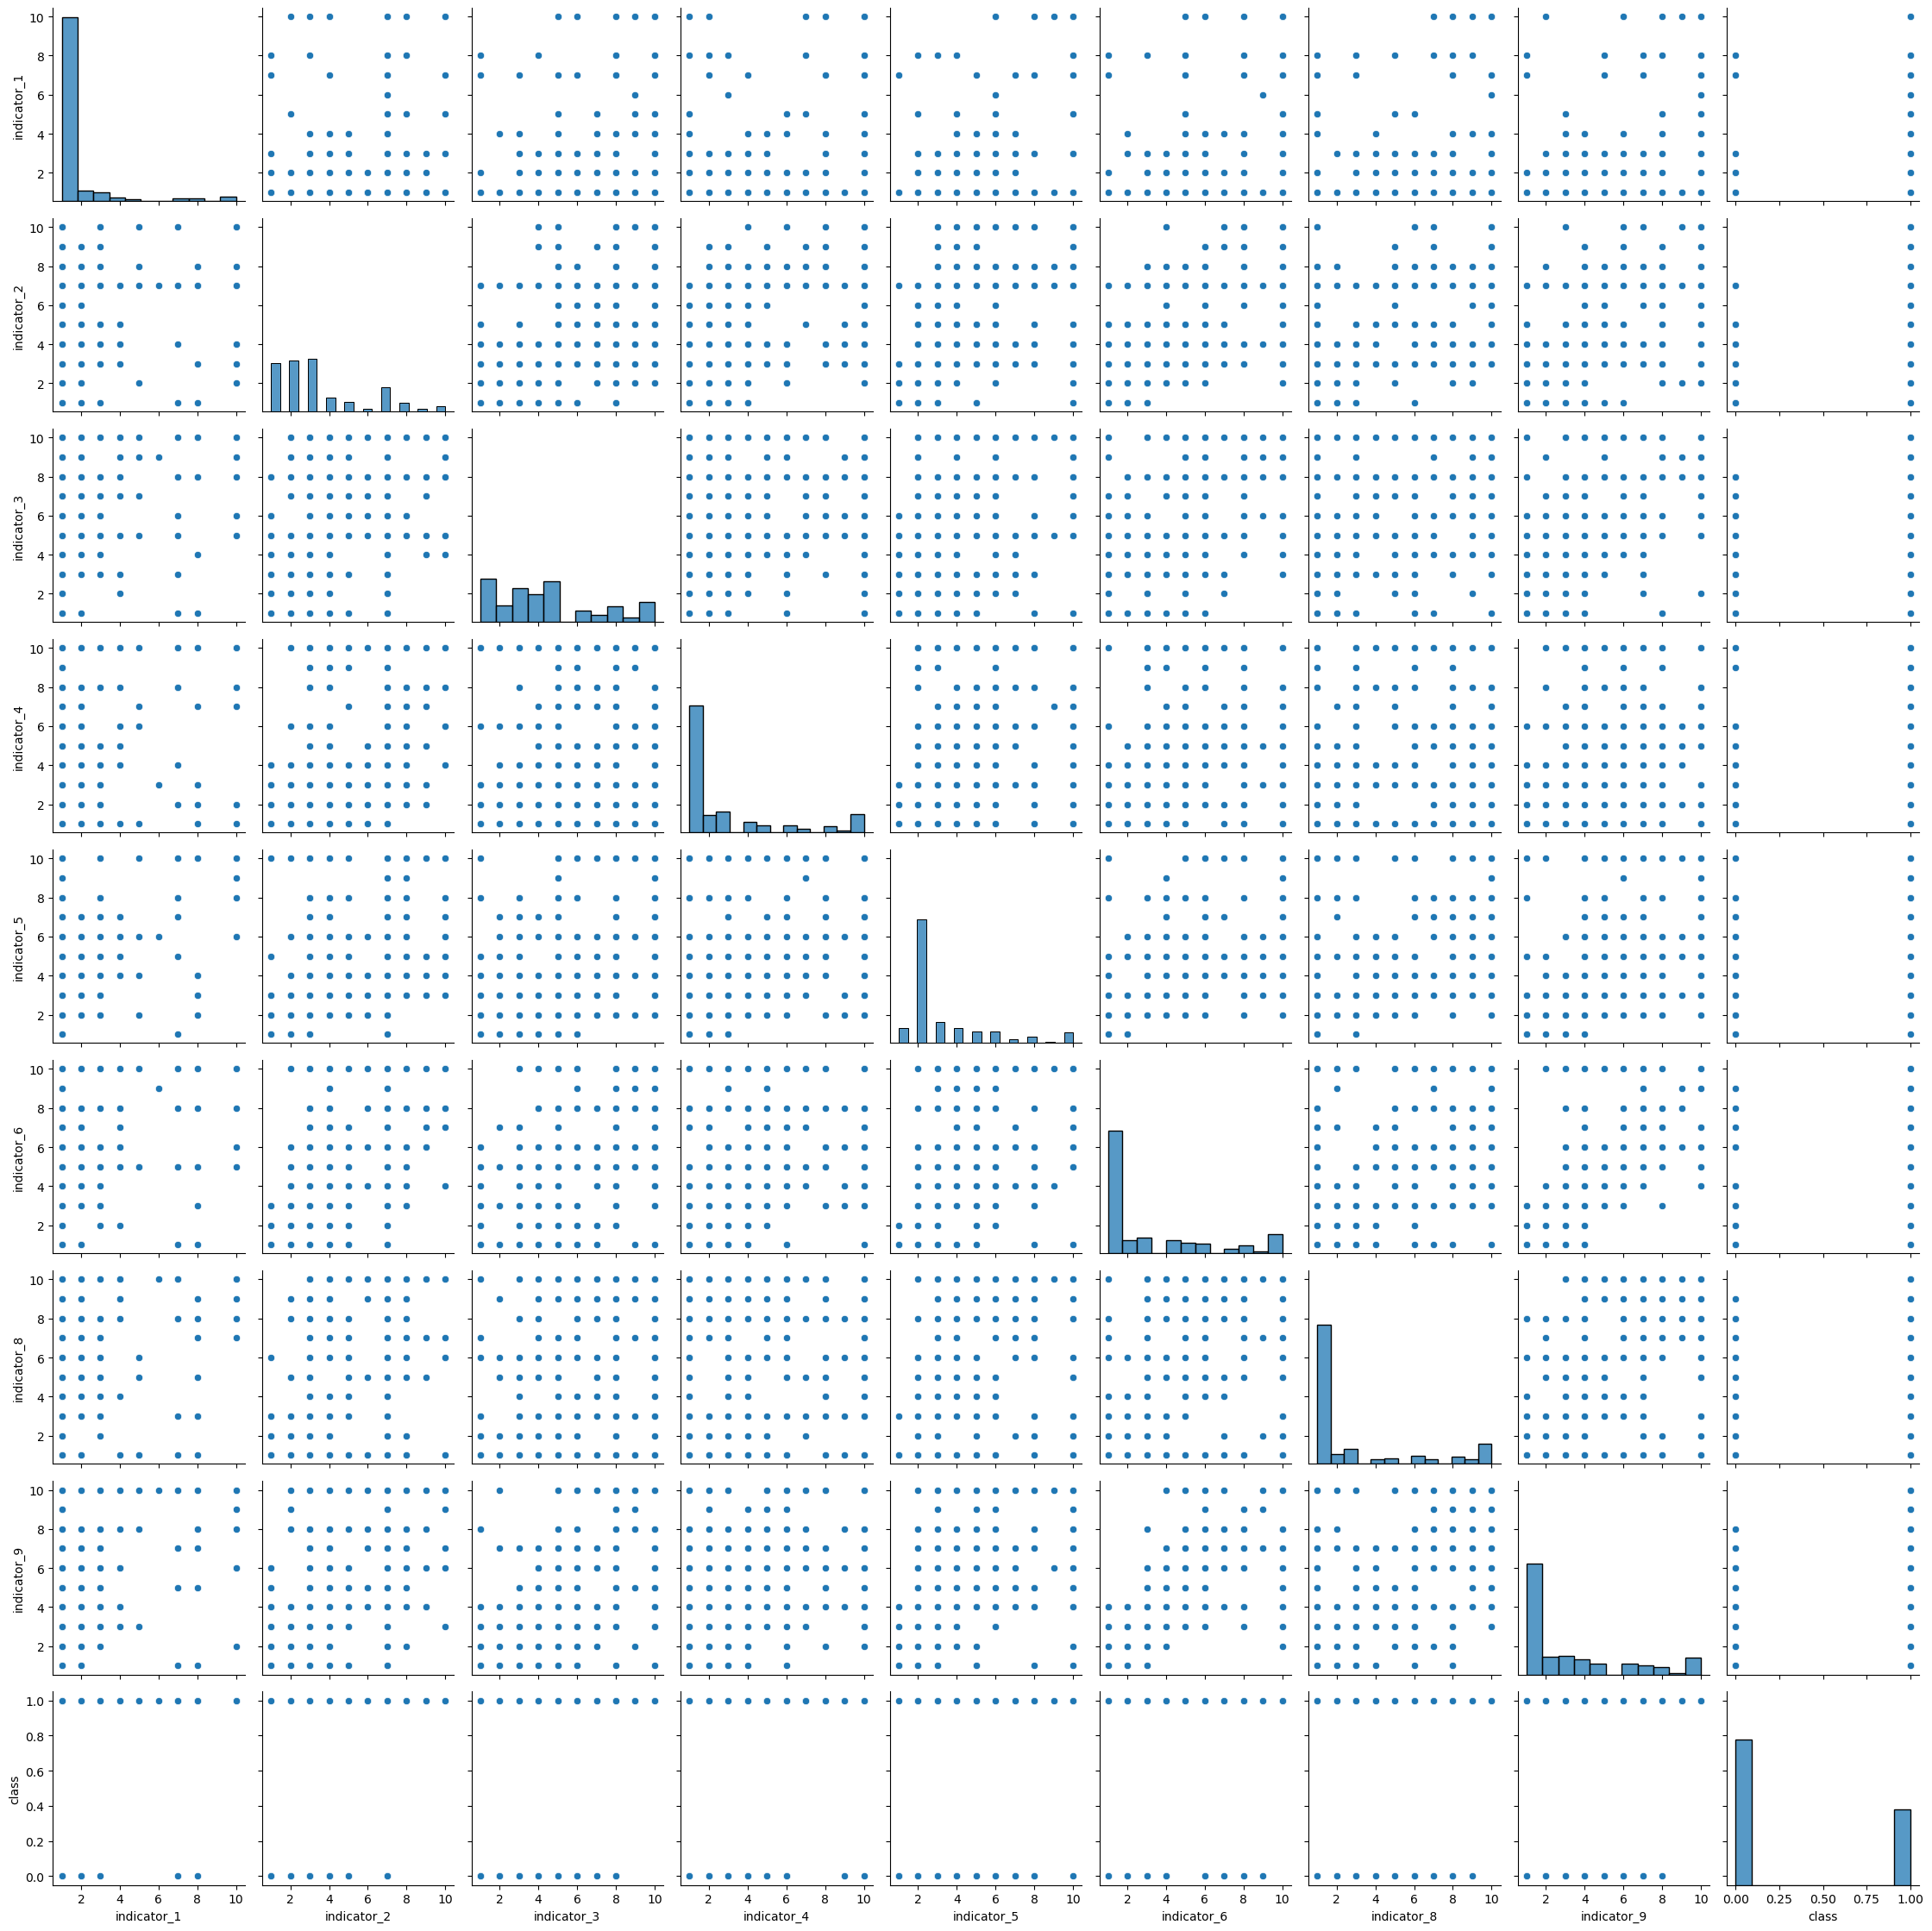

In [26]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

### Correlation

In [27]:
# feature correlations with sale is_canceled
is_class = df.corr(numeric_only=True)['class'].sort_values(ascending=False)[1:].to_frame()

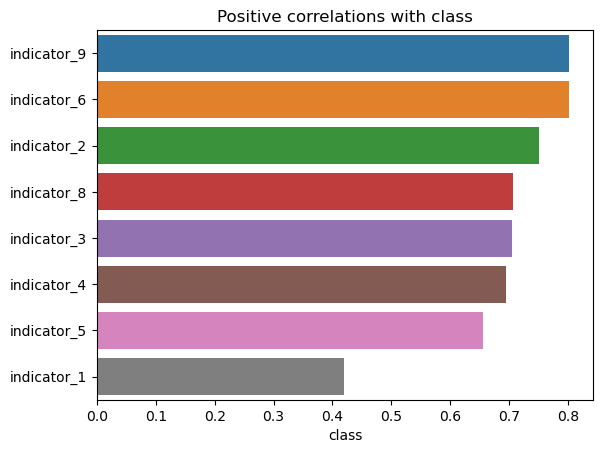

In [31]:
# positive correlations
pos_corrs = is_class[is_class['class'] >= 0]
sns.barplot(x='class', y=pos_corrs.index, data=pos_corrs)
plt.title('Positive correlations with class')
plt.show()

No hay correlaciones negativas

## Feature engineering

- Remove unnecessary features
- Encode categorical features: Label Encoding, One-Hot Encoding, ...
- Correlations?
- New features?

In [81]:
df.head()

,indicator_1,indicator_2,indicator_3,indicator_4,indicator_5,indicator_6,indicator_7,indicator_8,indicator_9,indicator_10,indicator_11,class
0,1,3,7,1,3,2,4,3,4,D,ZT,1
1,1,10,8,10,6,10,10,10,10,A,ZF,1
2,3,3,5,1,3,3,3,3,3,A,ZT,1
3,1,1,2,1,2,1,1,1,1,A,ZM,0
4,3,10,10,8,7,10,1,10,7,A,ZT,1


### Remove unnecessary features

Todas las features son importantes

### Missing Imputations

Nothing

### Categorical features

In [82]:
df.columns[df.dtypes == 'object']

Index(['indicator_7', 'indicator_10', 'indicator_11'], dtype='object')

In [83]:
df["indicator_7"].value_counts()

1     304
10    103
5      22
2      19
3      18
4      14
8      14
?      12
7       8
9       7
6       3
Name: indicator_7, dtype: int64

In [84]:
df["indicator_7"] = df["indicator_7"].replace("?", 0)

In [85]:
df["indicator_7"] = df["indicator_7"].astype(int)

In [86]:
df.columns[df.dtypes == 'object']

Index(['indicator_10', 'indicator_11'], dtype='object')

In [87]:
df["indicator_10"].value_counts()

A    286
D    128
B     57
C     28
E     25
Name: indicator_10, dtype: int64

In [88]:
df["indicator_11"].value_counts()

ZT    321
ZF    116
ZM     87
Name: indicator_11, dtype: int64

#### One-hot encoding

In [89]:
fts_to_onehot = [    
    'indicator_11',    
]

In [90]:
# Number of unique elements, to make sure we don't create too many columns
for ft in fts_to_onehot:
    print(ft, df[ft].nunique())

indicator_11 3


In [91]:
df = pd.get_dummies(df, columns=fts_to_onehot, drop_first=True)
df.head()

,indicator_1,indicator_2,indicator_3,indicator_4,indicator_5,indicator_6,indicator_7,indicator_8,indicator_9,indicator_10,class,indicator_11_ZM,indicator_11_ZT
0,1,3,7,1,3,2,4,3,4,D,1,0,1
1,1,10,8,10,6,10,10,10,10,A,1,0,0
2,3,3,5,1,3,3,3,3,3,A,1,0,1
3,1,1,2,1,2,1,1,1,1,A,0,1,0
4,3,10,10,8,7,10,1,10,7,A,1,0,1


#### Ordinal Encoding

In [92]:
from sklearn.preprocessing import OrdinalEncoder

In [93]:
categories = {
    'indicator_10': ['A', 'B', 'C', 'D', 'E'],   
}

In [94]:
enc = OrdinalEncoder(categories=list(categories.values()))
df[list(categories.keys())] = enc.fit_transform(df[list(categories.keys())])

### Correlations

In [95]:
# Get correlations between features without duplicates
corrs = df.corr().unstack().reset_index().drop_duplicates()
# Remove correlations between the same feature
corrs = corrs[corrs['level_0'] != corrs['level_1']]
# Get high correlations
corrs[(corrs[0] > 0.95) | (corrs[0] < -0.95)]

,level_0,level_1,0


### New Features

No he visto necesario crear una nueva feature

Save CSV

In [96]:
# Make sure all columns are numeric
assert df.select_dtypes(include='number').shape[1] == df.shape[1]

In [97]:
df.shape

(524, 13)

In [98]:
df.to_csv('data/cancer_prediction_feature_engineering.csv', index=False)

## Machine Learning Classification

### Load Data

In [99]:
df = pd.read_csv('data/cancer_prediction_feature_engineering.csv')
pd.options.display.max_columns = None   #para que muestren todas las columnas
df.head()

,indicator_1,indicator_2,indicator_3,indicator_4,indicator_5,indicator_6,indicator_7,indicator_8,indicator_9,indicator_10,class,indicator_11_ZM,indicator_11_ZT
0,1,3,7,1,3,2,4,3,4,3.0,1,0,1
1,1,10,8,10,6,10,10,10,10,0.0,1,0,0
2,3,3,5,1,3,3,3,3,3,0.0,1,0,1
3,1,1,2,1,2,1,1,1,1,0.0,0,1,0
4,3,10,10,8,7,10,1,10,7,0.0,1,0,1


In [100]:
df.shape

(524, 13)

### Train / Test

In [101]:
X = df.drop('class', axis=1)
y = df['class']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### Cross-validation

In [102]:
df['class'].value_counts()

0    345
1    179
Name: class, dtype: int64

In [103]:
# Declare KFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [104]:
# Declare scores to be used
scoring = {
    'Bacc': make_scorer(balanced_accuracy_score),
    'Prec': make_scorer(precision_score),
    'Rec': make_scorer(recall_score)
}

In [105]:
def print_metrics(cv_results):
    for sc in scoring.keys():
        print(f'Train {sc}:', cv_results[f'train_{sc}'].mean().round(2))
    print()
    for sc in scoring.keys():
        print(f'Validation {sc}:', cv_results[f'test_{sc}'].mean().round(2))
        
def print_metrics_rs(rand_search, idx=None):
    if idx is None:
        idx = rand_search.best_index_
    for sc in scoring.keys():
        print(f'Train {sc}:', rand_search.cv_results_[f'mean_train_{sc}'][idx].round(2))
    print()
    for sc in scoring.keys():
        print(f'Validation {sc}:', rand_search.cv_results_[f'mean_test_{sc}'][idx].round(2))

### Models

#### Baseline 1

In [107]:
from sklearn.dummy import DummyClassifier

In [108]:
bl1 = DummyClassifier(strategy='most_frequent')
bl1_cv = cross_validate(bl1, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(bl1_cv)

Train Bacc: 0.5
Train Prec: 0.0
Train Rec: 0.0

Validation Bacc: 0.5
Validation Prec: 0.0
Validation Rec: 0.0


c:\Users\Alumne_mati1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alumne_mati1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alumne_mati1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alumne_mati1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: Undefi

#### Baseline 2

In [109]:
bl2 = LogisticRegression(max_iter=10_000)
bl2_cv = cross_validate(bl2, X_train[['indicator_1']], y_train, cv=kf,
                        scoring=scoring, return_train_score=True)

print_metrics(bl2_cv)

Train Bacc: 0.71
Train Prec: 0.91
Train Rec: 0.44

Validation Bacc: 0.71
Validation Prec: 0.91
Validation Rec: 0.44


### Logistic Regression

In [110]:
lr = Pipeline([
    ('scaler', RobustScaler()),
    ('lr', LogisticRegression(solver='saga', max_iter=10_000, n_jobs=-1))
])

lr_cv = cross_validate(lr, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(lr_cv)

Train Bacc: 0.96
Train Prec: 0.96
Train Rec: 0.95

Validation Bacc: 0.95
Validation Prec: 0.94
Validation Rec: 0.93


### K-Neighbours Classifier

In [124]:
param_dist = {
    "scale": [StandardScaler(), RobustScaler(), MinMaxScaler()],
    "knn__n_neighbors": [3, 5, 8, 10, 12, 15, 20],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2]
}

knn = Pipeline([
    ('scale', None),
    ('knn', KNeighborsClassifier(n_jobs=-1))
])

knn_rscv = RandomizedSearchCV(knn, param_distributions=param_dist,
                              scoring=scoring, return_train_score=True,
                              cv=kf,
                              refit="Prec", n_jobs=-1)

knn_rscv.fit(X_train, y_train)
print("Mejores parámetros de RandomizedSearchCV: ", knn_rscv.best_params_)
print_metrics_rs(knn_rscv)

Mejores parámetros de RandomizedSearchCV:  {'scale': StandardScaler(), 'knn__weights': 'uniform', 'knn__p': 2, 'knn__n_neighbors': 8}
Train Bacc: 0.95
Train Prec: 0.96
Train Rec: 0.92

Validation Bacc: 0.95
Validation Prec: 0.96
Validation Rec: 0.92


### Decision Tree

In [111]:
from sklearn.tree import plot_tree

In [112]:
dt = DecisionTreeClassifier(max_depth=20)
dt_cv = cross_validate(dt, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(dt_cv)

Train Bacc: 1.0
Train Prec: 1.0
Train Rec: 1.0

Validation Bacc: 0.91
Validation Prec: 0.91
Validation Rec: 0.87


Train Bacc: 0.92
Train Prec: 0.87
Train Rec: 0.92

Validation Bacc: 0.9
Validation Prec: 0.84
Validation Rec: 0.9


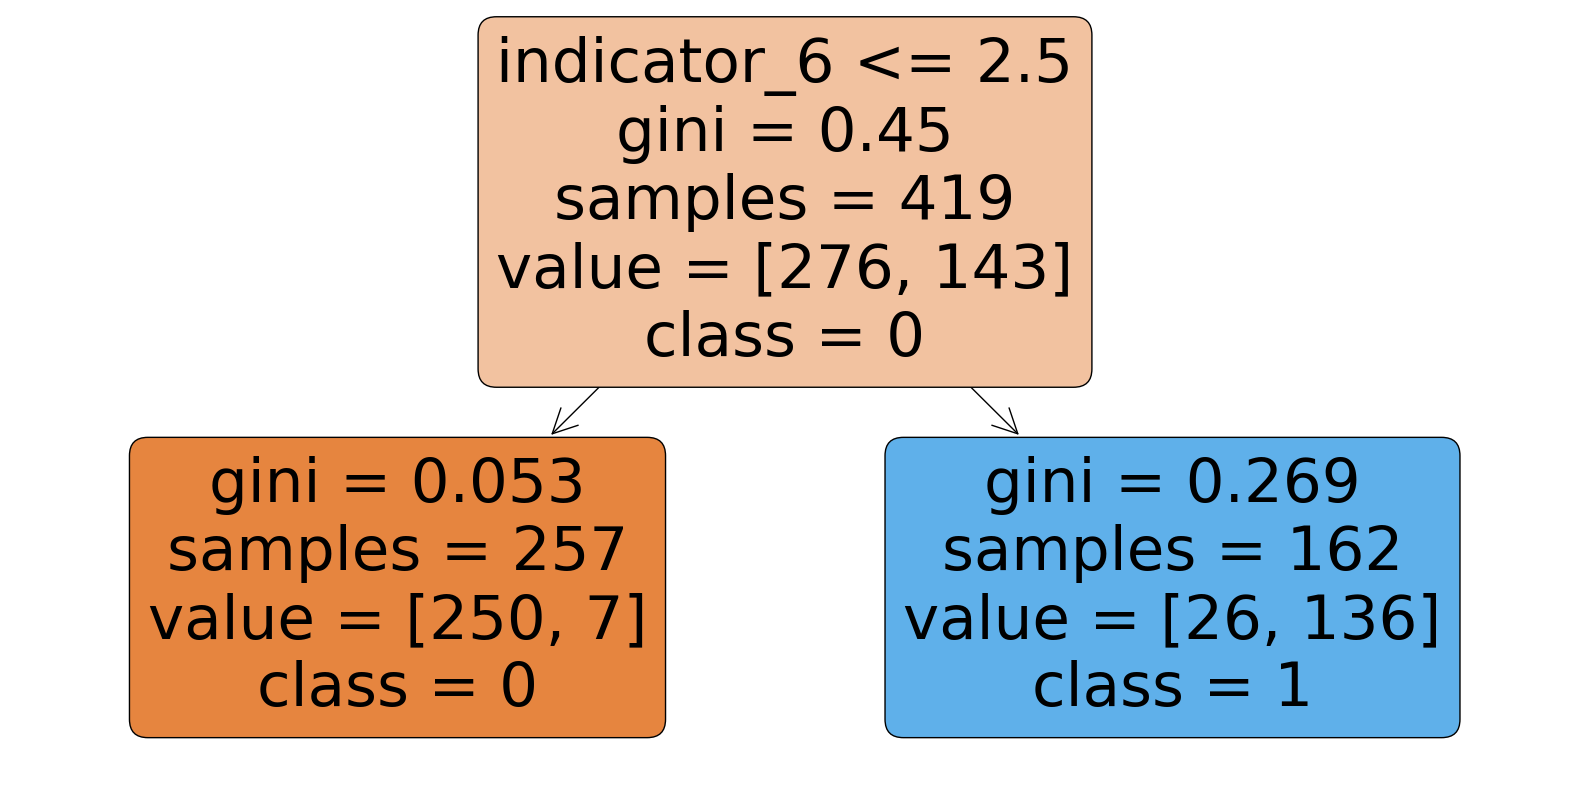

In [113]:
dt = DecisionTreeClassifier(max_depth=4,
                            min_samples_leaf=100,
                            min_impurity_decrease=0.01,
                            random_state=42)
dt_cv = cross_validate(dt, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)
print_metrics(dt_cv)
dt.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=list(X.columns),
          class_names=['0', '1'], rounded=True)
plt.show()

### Random Forest

In [114]:
rf = RandomForestClassifier(max_depth=20)
rf_cv = cross_validate(rf, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(rf_cv)

Train Bacc: 1.0
Train Prec: 1.0
Train Rec: 1.0

Validation Bacc: 0.95
Validation Prec: 0.94
Validation Rec: 0.94


In [136]:
param_dist = {
    "max_depth": [3, 5, 10, 20, 50, 100, None],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["entropy", "log_loss", "gini"],
    "n_estimators": np.arange(2,200),
    "max_features": ["sqrt", "log2", 0.2, 0.4, 0.6, 0.8],  
    "bootstrap": [True, False]
}
rf = RandomForestClassifier(n_jobs=-1)
rf_rscv = RandomizedSearchCV(rf, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit="Prec", random_state=42, n_jobs=-1)

rf_rscv.fit(X_train, y_train)
print("Best RandomizedSearchCV parameters: ", rf_rscv.best_params_)
print_metrics_rs(rf_rscv)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 85, 'min_samples_split': 25, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini', 'bootstrap': True}
Train Bacc: 0.98
Train Prec: 0.94
Train Rec: 0.99

Validation Bacc: 0.97
Validation Prec: 0.94
Validation Rec: 0.97


In [137]:
param_dist = {
    "max_depth": [3, 5, 10, 20, 50, 100, None],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["gini"],
    "n_estimators": np.arange(2,200),
    "max_features": ["sqrt"],  
    "bootstrap": [True]
}
rf = RandomForestClassifier(n_jobs=-1)
rf_rscv2 = RandomizedSearchCV(rf, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit="Prec",random_state=42, n_jobs=-1)

rf_rscv2.fit(X_train, y_train)
print("Best RandomizedSearchCV parameters: ", rf_rscv2.best_params_)
print_metrics_rs(rf_rscv2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 95, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
Train Bacc: 0.98
Train Prec: 0.95
Train Rec: 0.99

Validation Bacc: 0.97
Validation Prec: 0.95
Validation Rec: 0.97


In [147]:
param_dist = {
    "max_depth": [3, 5, 10, 20, 50, 100, None],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["entropy", "log_loss", "gini"],
    "n_estimators": np.arange(2,200),
    "max_features": ["sqrt", "log2", 0.2, 0.4, 0.6, 0.8],  
    "bootstrap": [True, False]
}
rf = RandomForestClassifier(n_jobs=-1)
rf_rscv = RandomizedSearchCV(rf, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit="Rec", random_state=42, n_jobs=-1)

rf_rscv.fit(X_train, y_train)
print("Best RandomizedSearchCV parameters: ", rf_rscv.best_params_)
print_metrics_rs(rf_rscv)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 78, 'min_samples_split': 27, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Train Bacc: 0.98
Train Prec: 0.94
Train Rec: 0.99

Validation Bacc: 0.97
Validation Prec: 0.94
Validation Rec: 0.98


In [148]:
param_dist = {
    "max_depth": [3, 5, 10, 20, 50, 100, None],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["gini"],
    "n_estimators": np.arange(2,200),
    "max_features": ["log2"],  
    "bootstrap": [True]
}
rf = RandomForestClassifier(n_jobs=-1)
rf_rscv3 = RandomizedSearchCV(rf, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit="Rec",random_state=42, n_jobs=-1)

rf_rscv3.fit(X_train, y_train)
print("Best RandomizedSearchCV parameters: ", rf_rscv3.best_params_)
print_metrics_rs(rf_rscv3)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 54, 'min_samples_split': 17, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 100, 'criterion': 'gini', 'bootstrap': True}
Train Bacc: 0.98
Train Prec: 0.94
Train Rec: 0.99

Validation Bacc: 0.97
Validation Prec: 0.94
Validation Rec: 0.98


#### Confusion Matrix

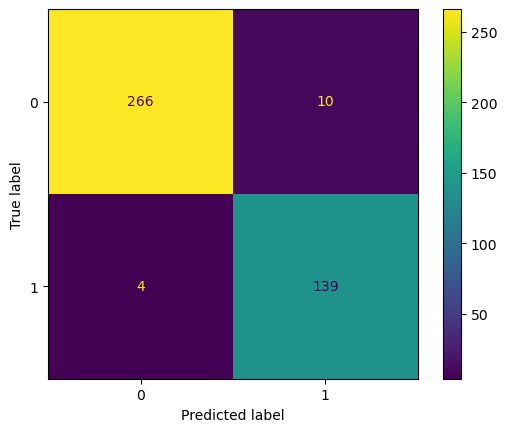

In [149]:
# cross_val_predict returns the predictions for each data point in the validation sets
val_preds = cross_val_predict(rf_rscv.best_estimator_, X_train, y_train, cv=kf)

cm = confusion_matrix(y_train, val_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])
disp.plot()
plt.show()

In [116]:
rf.fit(X_train, y_train)
rf_ft_imps = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False).round(3)

rf_ft_imps.head(20)

,feature,importance
5,indicator_6,0.237
6,indicator_7,0.188
8,indicator_9,0.171
1,indicator_2,0.149
7,indicator_8,0.088
4,indicator_5,0.060
2,indicator_3,0.053
3,indicator_4,0.030
0,indicator_1,0.011
9,indicator_10,0.008


### Gradient Boosting Decision Tree

In [145]:
param_dist = {
    "max_depth": [3, 5, 10, 20],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["friedman_mse", "squared_error"],
    "n_estimators": np.arange(2,200),
    "max_features": ["sqrt", "log2", 0.2, 0.4, 0.6, 0.8], 
    "learning_rate": [ 0.01, 0.025, 0.05, 0.075, 0.1]
}
gb = GradientBoostingClassifier()
gb_rscv = RandomizedSearchCV(gb, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit="Rec",random_state=42, n_jobs=-1)

gb_rscv.fit(X_train, y_train)
print("Best RandomizedSearchCV parameters: ", gb_rscv.best_params_)
print_metrics_rs(gb_rscv)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 139, 'min_samples_split': 21, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.025, 'criterion': 'friedman_mse'}
Train Bacc: 1.0
Train Prec: 0.99
Train Rec: 1.0

Validation Bacc: 0.96
Validation Prec: 0.93
Validation Rec: 0.95


In [146]:
param_dist = {
    "max_depth": [3, 5, 10, 20],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["friedman_mse"],
    "n_estimators": np.arange(2,200),
    "max_features": ["log2"], 
    "learning_rate": [ 0.01, 0.025, 0.05, 0.075, 0.1]
}
gb = GradientBoostingClassifier()
gb_rscv2 = RandomizedSearchCV(gb, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit="Rec", random_state=42, n_jobs=-1)

gb_rscv2.fit(X_train, y_train)
print("Best RandomizedSearchCV parameters: ", gb_rscv2.best_params_)
print_metrics_rs(gb_rscv2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 182, 'min_samples_split': 26, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.01, 'criterion': 'friedman_mse'}
Train Bacc: 0.98
Train Prec: 0.96
Train Rec: 0.99

Validation Bacc: 0.96
Validation Prec: 0.94
Validation Rec: 0.95


### SVC

In [150]:
svc_pipe = ImbPipeline([
    ('rus', RandomUnderSampler()),
    ('svc', SVC()),
])

svc_cv = cross_validate(svc_pipe, X_train, y_train, cv=kf,
                        scoring=scoring, return_train_score=True)

print_metrics(svc_cv)

Train Bacc: 0.97
Train Prec: 0.94
Train Rec: 0.98

Validation Bacc: 0.96
Validation Prec: 0.92
Validation Rec: 0.97


### Balanced Random Forest

In [151]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [152]:
brf = BalancedRandomForestClassifier(200,
                                     max_depth=None,
                                     sampling_strategy='not minority',
                                     replacement=True,
                                     n_jobs=-1)
brf_cv = cross_validate(brf, X_train, y_train, cv=kf,
                        scoring=scoring, return_train_score=True)

print_metrics(brf_cv)

Train Bacc: 0.98
Train Prec: 0.94
Train Rec: 1.0

Validation Bacc: 0.97
Validation Prec: 0.92
Validation Rec: 0.98


In [153]:
brf.fit(X_train, y_train)
brf_ft_imps = pd.DataFrame({
    'feature': X_train.columns,
    'importance': brf.feature_importances_
}).sort_values('importance', ascending=False).round(3)

brf_ft_imps.head(20)

,feature,importance
8,indicator_9,0.227
5,indicator_6,0.197
6,indicator_7,0.196
1,indicator_2,0.093
7,indicator_8,0.092
4,indicator_5,0.078
2,indicator_3,0.064
3,indicator_4,0.030
0,indicator_1,0.010
9,indicator_10,0.008


### Test

In [154]:
y_pred_test = rf_rscv.predict(X_test)
recall_score(y_test, y_pred_test).round(2)

0.97

RF
Train Recall: 0.993006993006993
Test Precision: 0.9210526315789473
Test Recall: 0.9722222222222222



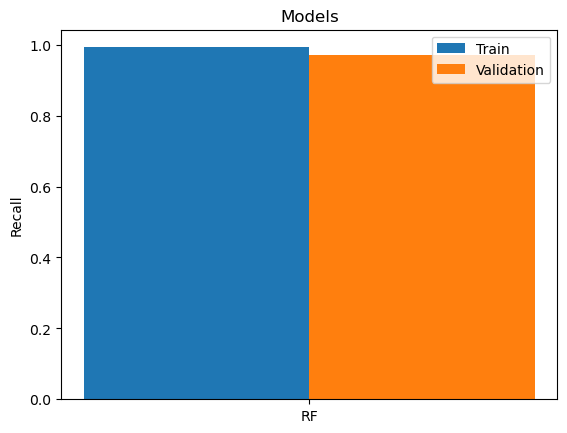

In [156]:
models = [
    ('RF', rf_rscv),
]

y_train_axis = []
y_valid_axis = []

for name, model in models:
    model.best_estimator_.fit(X_train, y_train)
    y_train_pred = model.best_estimator_.predict(X_train)
    y_test_pred = model.best_estimator_.predict(X_test)
    y_train_axis.append(recall_score(y_train, y_train_pred))
    y_valid_axis.append(recall_score(y_test, y_test_pred))
    print(name)
    print('Train Recall:', recall_score(y_train, y_train_pred))
    print('Test Precision:', precision_score(y_test, y_test_pred))
    print('Test Recall:', recall_score(y_test, y_test_pred))
    print()

x_axis = np.arange(len(models))
plt.bar(x_axis - 0.2, y_train_axis, 0.4, label = 'Train')
plt.bar(x_axis + 0.2, y_valid_axis, 0.4, label = 'Validation')
  
plt.xticks(x_axis, [name for name, _ in models])
plt.ylabel('Recall')
plt.title('Models')
plt.legend()
plt.show()

In [161]:
brf_ft_imps = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_rscv.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False).round(3)

brf_ft_imps.head(20)

,feature,importance
6,indicator_7,0.259
5,indicator_6,0.198
8,indicator_9,0.174
1,indicator_2,0.109
7,indicator_8,0.106
4,indicator_5,0.081
3,indicator_4,0.041
2,indicator_3,0.029
0,indicator_1,0.003
9,indicator_10,0.001


####  ROC-AUC curve

In [162]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

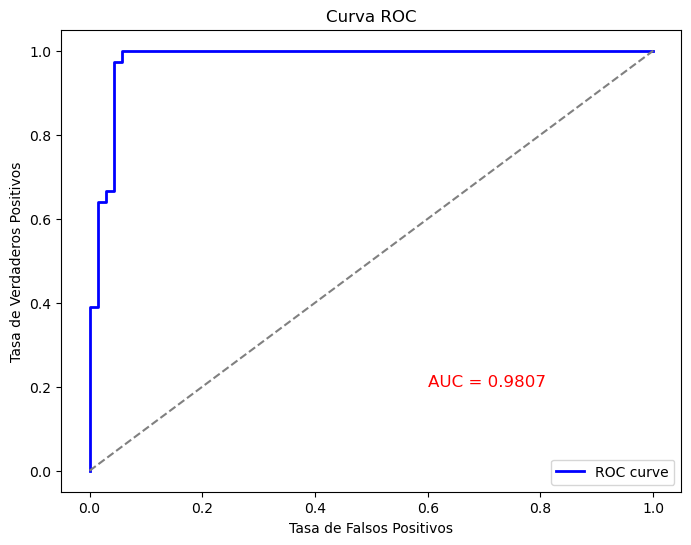

In [164]:
# Obtén las probabilidades de predicción del modelo
y_pred_proba = rf_rscv.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Dibuja la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()

# Calcula el AUC
auc = roc_auc_score(y_test, y_pred_proba)
plt.text(0.6, 0.2, f'AUC = {auc:.4f}', fontsize=12, color='red')
plt.show()

#### Precision-Recall Curve

In [165]:
from sklearn.metrics import precision_recall_curve

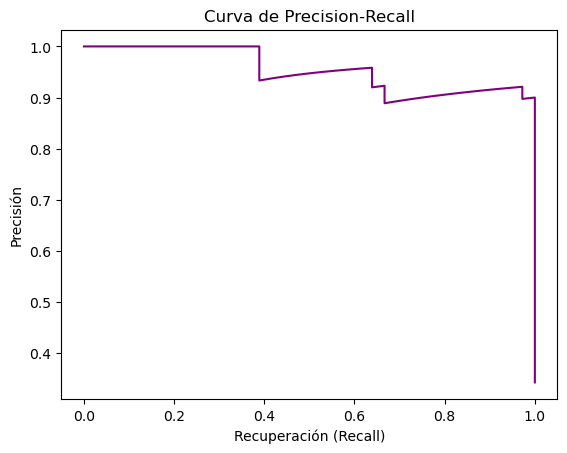

In [167]:
y_pred_proba = rf_rscv.predict_proba(X_test)[:, 1]

# Calcula la precisión y recuperación
precision, recall, _= precision_recall_curve(y_test, y_pred_proba)

# Crea la curva de precisión-recuperación
plt.plot(recall, precision, color='purple')
plt.xlabel('Recuperación (Recall)')
plt.ylabel('Precisión')
plt.title('Curva de Precision-Recall')
plt.show()

In [168]:
y_test_probs_1 = rf_rscv.predict_proba(X_test)[:, 1]
y_test_probs_1

array([3.66300366e-04, 0.00000000e+00, 8.81850072e-01, 8.56194550e-01,
       0.00000000e+00, 1.62800163e-02, 6.54718212e-01, 0.00000000e+00,
       2.13675214e-04, 0.00000000e+00, 3.03174015e-02, 2.84900285e-04,
       9.57101879e-01, 6.25390869e-04, 8.45238646e-01, 2.13675214e-04,
       8.41971795e-01, 0.00000000e+00, 1.77215991e-01, 9.71297505e-01,
       6.25390869e-04, 9.76393311e-01, 8.07978486e-01, 0.00000000e+00,
       8.63004847e-01, 9.91552382e-01, 8.93255253e-01, 3.66300366e-04,
       3.66300366e-04, 3.66300366e-04, 9.38135740e-01, 3.66300366e-04,
       5.30013056e-02, 9.84869068e-01, 9.48317869e-01, 9.66497975e-01,
       1.40819691e-01, 6.37051353e-01, 3.66300366e-04, 9.79936045e-01,
       9.09142135e-01, 9.49332794e-01, 3.66300366e-04, 7.16253605e-02,
       0.00000000e+00, 9.93856130e-03, 2.30082418e-02, 1.95521512e-01,
       2.15164240e-03, 0.00000000e+00, 9.87726005e-01, 0.00000000e+00,
       1.40819691e-01, 2.40766178e-02, 4.43483653e-02, 9.35145514e-01,
      

In [169]:
# Percentages study
print(f'Total test samples: {len(y_test):,}\n')

for limit in [0.1, 0.2, 0.3, 0.4]:
    # indices of the probabilities below limit and above 1-limit
    extreme_prob_idxs = np.where((y_test_probs_1 < limit) | (y_test_probs_1 > (1 - limit)))[0]
    preds = (y_test_probs_1[extreme_prob_idxs] > 0.5).astype(int)

    print(f'{limit} | {1-limit} | Samples: {len(preds):,} ({len(preds)/len(y_test):.0%})')
    print('-------------')
    print('Bacc:', balanced_accuracy_score(y_test.iloc[extreme_prob_idxs], preds).round(2))
    print('Prec:', precision_score(y_test.iloc[extreme_prob_idxs], preds).round(2))
    print('Rec:', recall_score(y_test.iloc[extreme_prob_idxs], preds).round(2))
    print()

Total test samples: 105

0.1 | 0.9 | Samples: 83 (79%)
-------------
Bacc: 0.99
Prec: 0.95
Rec: 1.0

0.2 | 0.8 | Samples: 98 (93%)
-------------
Bacc: 0.96
Prec: 0.9
Rec: 0.97

0.3 | 0.7 | Samples: 101 (96%)
-------------
Bacc: 0.96
Prec: 0.91
Rec: 0.97

0.4 | 0.6 | Samples: 103 (98%)
-------------
Bacc: 0.96
Prec: 0.92
Rec: 0.97

